In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Wczytanie danych
ds_train = pd.read_csv('./train.csv')
ds_test = pd.read_csv('./test.csv')
print(f'Train shape: {ds_train.shape}')
print(f'Test shape: {ds_test.shape}')

Train shape: (42000, 785)
Test shape: (28000, 784)


In [2]:
from sklearn.model_selection import train_test_split

X_train_full = ds_train.drop('label', axis=1)
y_train_full = ds_train['label']

# Normalizacja pikseli

X_train_full = X_train_full / 255
X_test = ds_test / 255

# Podział na zbiór treningowy i walidacyjny
X_train, X_valid = X_train_full[:-2000], X_train_full[-2000:]
y_train, y_valid = y_train_full[:-2000], y_train_full[-2000:]

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print("Czy X_valid zawiera NaN:", np.isnan(X_valid).any())
print("Czy X_valid zawiera inf:", np.isinf(X_valid).any())
print("Czy y_valid zawiera NaN:", np.isnan(y_valid).any())
print("Czy y_valid zawiera inf:", np.isinf(y_valid).any())

(40000, 784)
(2000, 784)
(40000,)
(2000,)
Czy X_valid zawiera NaN: pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 784, dtype: bool
Czy X_valid zawiera inf: pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 784, dtype: bool
Czy y_valid zawiera NaN: False
Czy y_valid zawiera inf: False


In [3]:
# Dodanie wymiaru kanału dla "Splotowej Sieci Neuronowej"
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_valid = X_valid.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)


In [8]:
from tensorflow.keras import layers, models

model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8617 - loss: 0.4535 - val_accuracy: 0.9735 - val_loss: 0.0852
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9780 - loss: 0.0676 - val_accuracy: 0.9790 - val_loss: 0.0621
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9829 - loss: 0.0521 - val_accuracy: 0.9850 - val_loss: 0.0517
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9874 - loss: 0.0370 - val_accuracy: 0.9845 - val_loss: 0.0436
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0296 - val_accuracy: 0.9845 - val_loss: 0.0540
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9931 - loss: 0.0227 - val_accuracy: 0.9840 - val_loss: 0.0420
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9941 - loss: 0.0179 - val_accuracy: 0.9890 - val_loss: 0.0352
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9949 - loss: 0.0166 - 

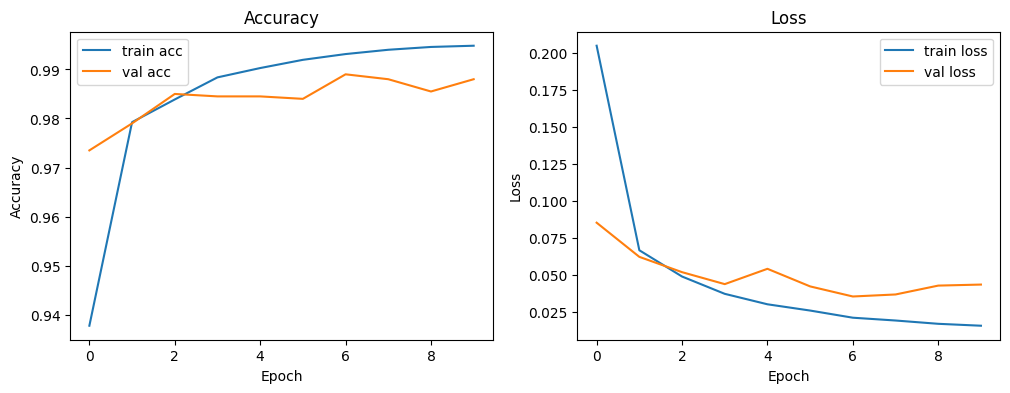

In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
plot_history(history)

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train acc')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='val loss')
    else:
        print("⚠️ Nie znaleziono 'val_loss' — czy podałeś validation_data?")
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [11]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [12]:
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(y_pred) + 1),
    "Label": y_pred
})

submission.to_csv("submission.csv", index=False)